In [1]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import Settings0D
from PySDM_examples.deJong_Mackay_2022 import run_box_breakup
from atmos_cloud_sim_uj_utils import show_plot
import numpy as np

from PySDM.dynamics.collisions.coalescence_efficiencies import ConstEc, Straub2010Ec
from PySDM.dynamics.collisions.breakup_fragmentations import Gaussian, AlwaysN, Straub2010Nf
from PySDM.physics.constants import si

# import os
# os.environ["NUMBA_DISABLE_JIT"] = '1'

## Sensitivity to Ec (coalescence efficiency)

finished Ec=1.0
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.9901573e+05 0.0000000e+00 9.9901573e+05 0.0000000e+00]
 [9.6972000e+02 0.0000000e+00 9.6972000e+02 0.0000000e+00]]
finished Ec=0.95
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.43101880e+06 0.00000000e+00 1.36332398e+06 6.57763000e+04]
 [1.28840300e+04 0.00000000e+00 1.22289400e+04 6.08880000e+02]]
finished Ec=0.9
[[      0.         0.         0.         0.  ]
 [2370906.74       0.   2129871.46  228263.88]
 [ 208837.55       0.    187988.82   19738.89]]
finished Ec=0.8
[[      0.         0.         0.         0.  ]
 [6308955.03       0.   5055355.98 1189658.2 ]
 [9336800.89       0.   7482059.74 1766994.49]]
finished Straub
[[      0.         0.         0.         0.  ]
 [1012854.8        0.   1010284.31    2452.29]
 [   8983.87       0.      7710.59    1181.07]]


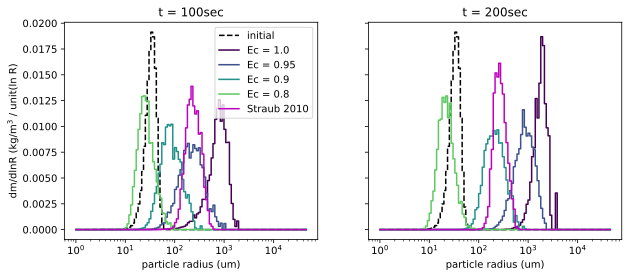

HTML(value="<a href='./figures_Ec_sensitivity.pdf' target='_blank'>./figures_Ec_sensitivity.pdf</a><br>")

In [5]:
settings = Settings0D()

rmin = 0.1 * si.um
vmin = 4/3 * np.pi * rmin**3
settings.fragmentation = AlwaysN(n=8, vmin=vmin)

settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(1.0 * si.um), np.log10(10000 * si.um), num=128, endpoint=True
        )

settings.warn_overflows = False
t_steps = [0, 100, 200]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

Ec_vals = [1.0, 0.95, 0.9, 0.8]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
ax[1].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')

for (i, Ec) in enumerate(Ec_vals):
    settings.coal_eff = ConstEc(Ec=Ec)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished Ec="+str(Ec))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'Ec = ' + str(Ec)
        if Ec == 1.0:
            lbl = 'Ec = 1.0'
        ax[j-1].step(x,y[j]*settings.rho, color=cmap(i/len(Ec_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)


settings.coal_eff = Straub2010Ec()
(x,y,rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    lbl = 'Straub 2010'
    ax[j-1].step(x,y[j]*settings.rho, color='m', label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
print("finished Straub")
print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[1].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[0].legend()
ax[0].set_title("t = 100sec")
ax[1].set_title("t = 200sec")
show_plot('figures_Ec_sensitivity.pdf')

## Sensitivity to n_f

finished nf=1
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.33100792e+05 4.81666667e+00 7.90041667e+05 4.30585917e+04]]
finished nf=4
[[     0.         0.         0.         0.   ]
 [972196.95       0.    923867.5    47806.825]]
finished nf=16
[[      0.               0.               0.               0.        ]
 [1978002.58333333       0.         1879940.39166667   85986.66666667]]
finished nf=64
[[       0.                0.                0.                0.        ]
 [21075951.75              0.         20034823.175        618280.60833333]]
4.768389119586232e-13 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.68817485e+07 5.73333333e+00 2.58519832e+07 8.25298350e+05]]
1.192097279896558e-13 [[       0.                0.                0.                0.        ]
 [77090797.94166666        0.         72791878.41666667  2820468.48333333]]
2.980243199741395e-14 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.70149899e+08 0.

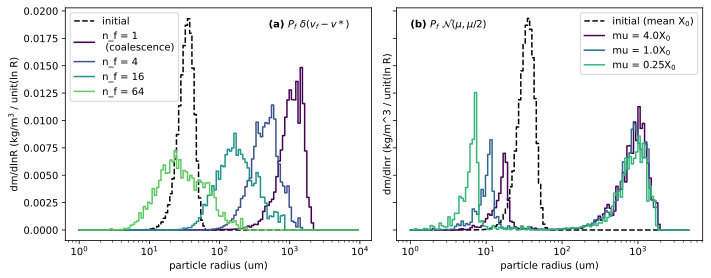

HTML(value="<a href='./figures_Pf_sensitivity_constEc.pdf' target='_blank'>./figures_Pf_sensitivity_constEc.pd…

In [11]:
# Constant n_f
settings = Settings0D()
settings.coal_eff = ConstEc(Ec=0.95)
settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(1e0 * si.um), np.log10(1e4 * si.um), num=128, endpoint=True
        )
settings.warn_overflows = False
t_steps = [0, 120]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []
nf_vals = [1, 4, 16, 64]
(x,y,rates) = run_box_breakup(settings, [0])

fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
for (i, nf) in enumerate(nf_vals):
    settings.fragmentation = AlwaysN(n=nf)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished nf="+str(nf))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'n_f = ' + str(nf)
        if nf == 1:
            lbl += '\n (coalescence)'
        ax[0].step(x,y[j]*settings.rho, color=cmap(i/len(nf_vals)),
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)
ax[0].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[0].legend()
ax[0].annotate("(a) $P_f ~ \delta(v_f - v*)$", [5e2, 0.0185], weight='bold')
#ax.set_title("Constant Ec=0.95, Always n_f fragments, t=120s")
#show_plot('figures_nf_sensitivity_constEc.pdf')


# Gaussian fragmentation
settings = Settings0D()
t_steps = [0, 120]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []
settings.n_sd = 2**13
settings.warn_overflows = False
settings.radius_bins_edges = np.logspace(
            np.log10(1.0 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )
X0 = settings.X0
mu_vals = [4*X0, X0, X0/4]
vmin = 0.0
nfmax = None
Ec = 0.95
settings.coal_eff=ConstEc(Ec=Ec)

(x,y,rates) = run_box_breakup(settings, [0])
#pyplot.figure(figsize=(6,4),dpi=200)
ax[1].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial (mean X$_0$)')
for (i, mu) in enumerate(mu_vals):
    settings.fragmentation = Gaussian(mu=mu, sigma=mu/2, vmin=vmin, nfmax=nfmax)
    (x,y, rates) = run_box_breakup(settings, t_steps)
    print(mu, rates)
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'mu = ' + str(round(mu/X0,2)) + 'X$_0$'
        ax[1].step(x,y[j]*settings.rho, color=cmap(i/len(mu_vals)),linestyle='-',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')

ax[1].set_xscale("log")
ax[1].set_xlabel("particle radius (um)")
ax[1].set_ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
ax[1].legend()
ax[1].annotate("(b) $P_f ~ \mathcal{N}(\mu,\mu/2)$", [1.0, 0.0185], weight='bold')
pyplot.tight_layout()
#pyplot.title("Gaussian Fragmentation Fn, Constant Ec="+str(Ec)+", t=120s")
show_plot('figures_Pf_sensitivity_constEc.pdf')

## Fully Stochastic: Straub 2010

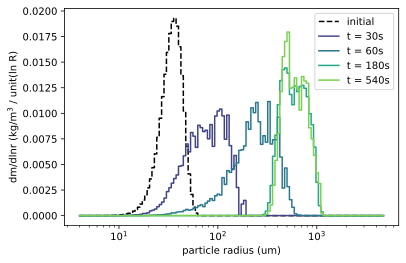

HTML(value="<a href='./figures_straub_box.pdf' target='_blank'>./figures_straub_box.pdf</a><br>")

In [18]:
settings = Settings0D()
t_steps = [0, 30, 60, 180, 540]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

settings.n_sd = 2**13
settings.warn_overflows = False
settings.radius_bins_edges = np.logspace(
            np.log10(4.0 * si.um), np.log10(5e3 * si.um), num=128, endpoint=True
        )
vmin = X0 * 1e-3
nfmax = 10
settings.coal_eff=Straub2010Ec()
settings.fragmentation=Straub2010Nf(vmin=vmin, nfmax=nfmax)

(x,y,rates) = run_box_breakup(settings, [0])
pyplot.figure(figsize=(6,4),dpi=200)
pyplot.step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')

(x,y, rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    pyplot.step(x,y[j]*settings.rho, color=cmap(j/len(t_steps)),linestyle='-',
            label=f't = {step}s')

pyplot.xscale("log")
pyplot.xlabel("particle radius (um)")
pyplot.ylabel("dm/dlnr (kg/m$^3$ / unit(ln R)")
pyplot.legend()
#pyplot.title("Straub 2010 Ec and Nf")
show_plot('figures_straub_box.pdf')